In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(r'c:\Users\Giriraj S A\Documents\Datascience Assessment.csv')

In [3]:
df=pd.DataFrame(data)

In [4]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
print(df)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [8]:
import pandas as pd

# Assuming df is your original DataFrame

# Calculate the percentage of null values
null_percentage = df.isnull().mean() * 100

# Identify columns with 60% or more null values
columns_with_high_nulls = null_percentage[null_percentage >= 60].index

# Store these columns in a separate DataFrame
high_null_columns_df = pd.DataFrame(columns_with_high_nulls, columns=['High_Null_Columns'])

# Drop columns with high percentage of null values from the original DataFrame
df_cleaned = df.drop(columns=columns_with_high_nulls)

# Display the DataFrames
print("Columns with high percentage of null values:")
print(high_null_columns_df)
print("\nDataFrame after dropping these columns:")
print(df_cleaned)

Columns with high percentage of null values:
Empty DataFrame
Columns: [High_Null_Columns]
Index: []

DataFrame after dropping these columns:
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  7

In [9]:
df_cleaned

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [11]:
df_cleaned.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

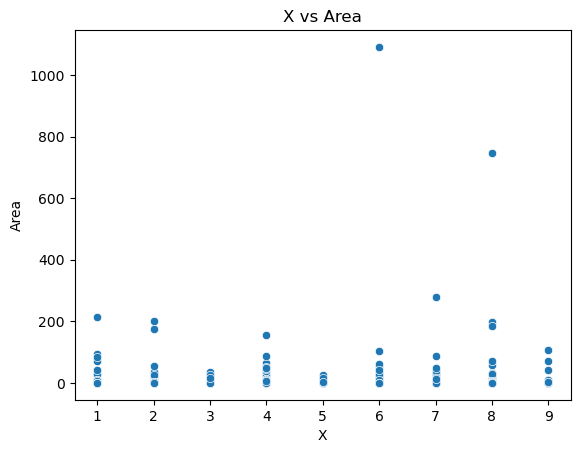

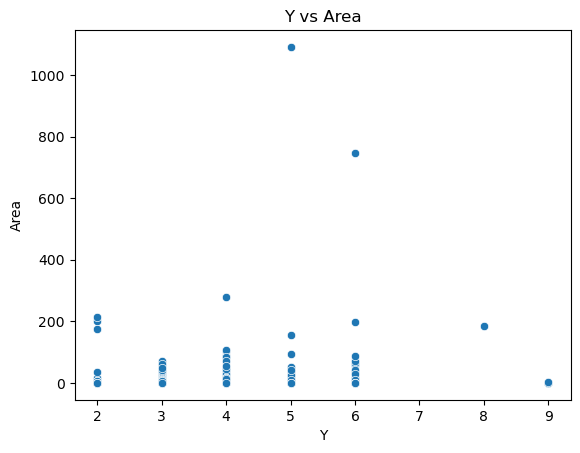

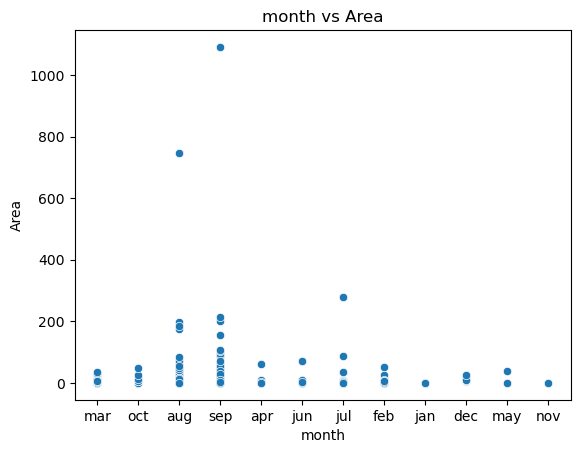

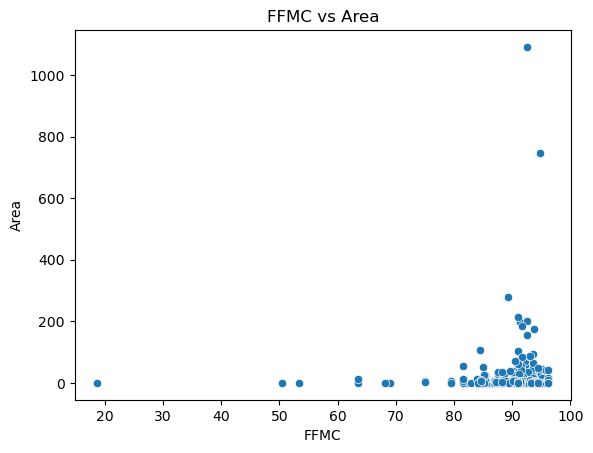

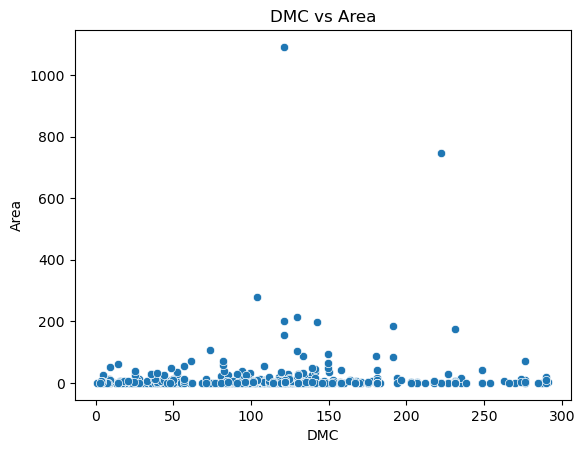

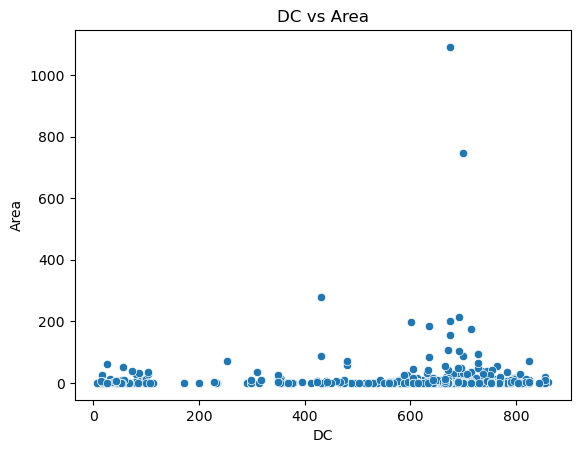

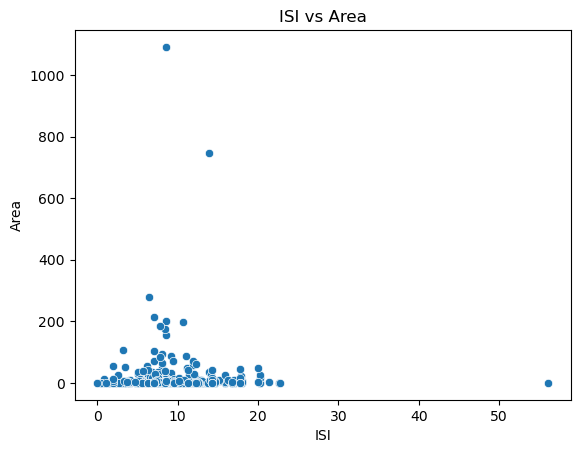

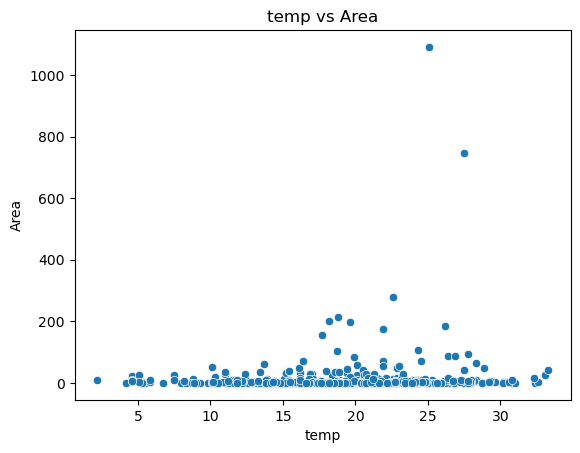

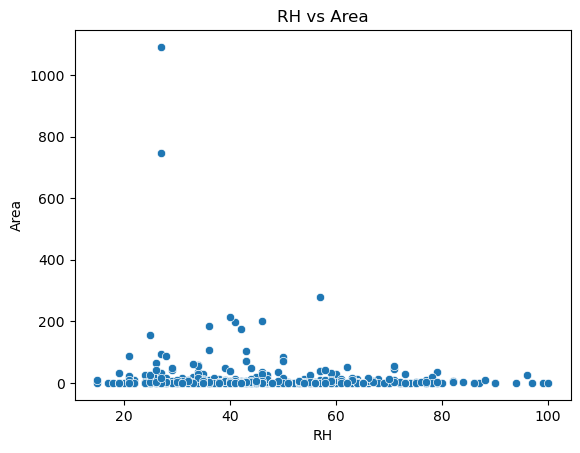

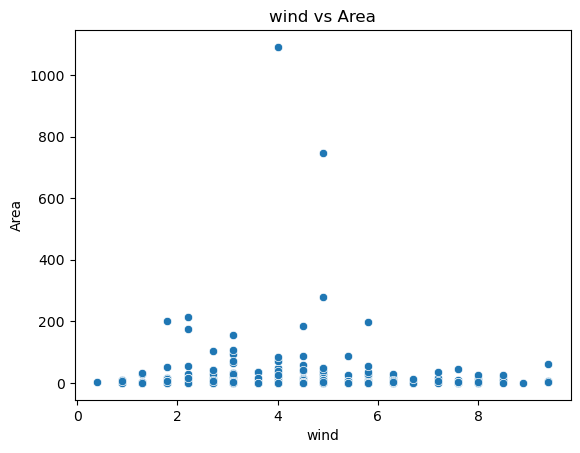

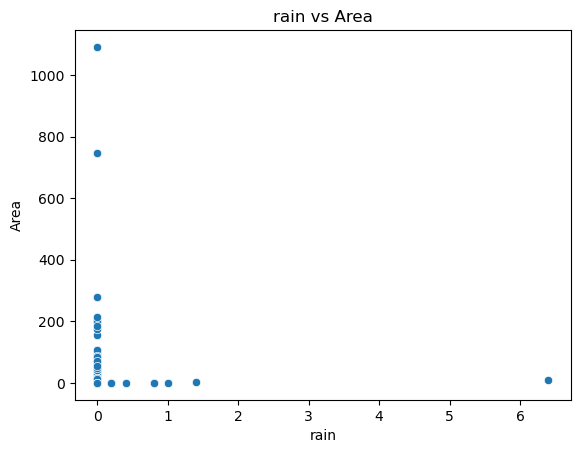

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
features = ['X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
for feature in features:
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['area'])
    plt.title(f'{feature} vs Area')
    plt.xlabel(feature)
    plt.ylabel('Area')
    plt.show()


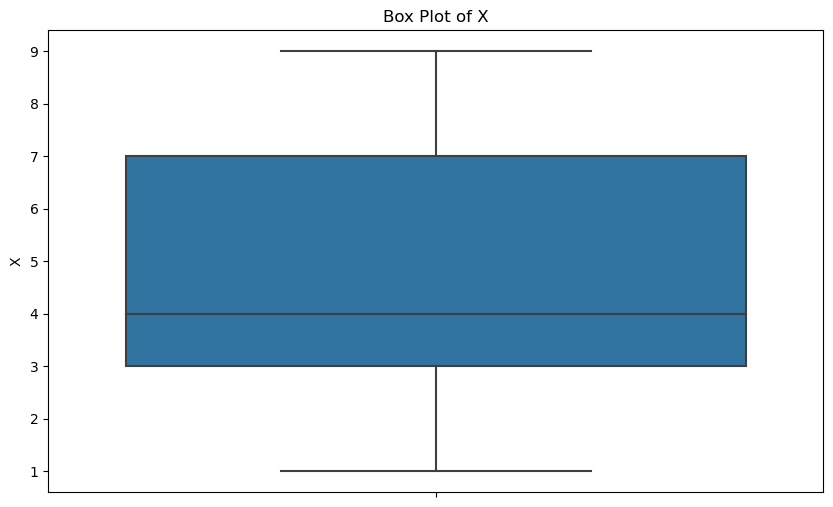

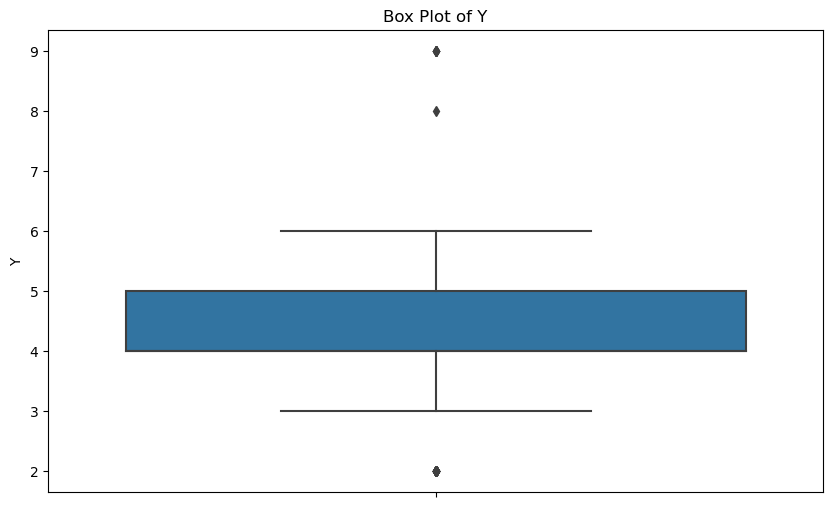

month is not numeric and will be skipped.


<Figure size 1000x600 with 0 Axes>

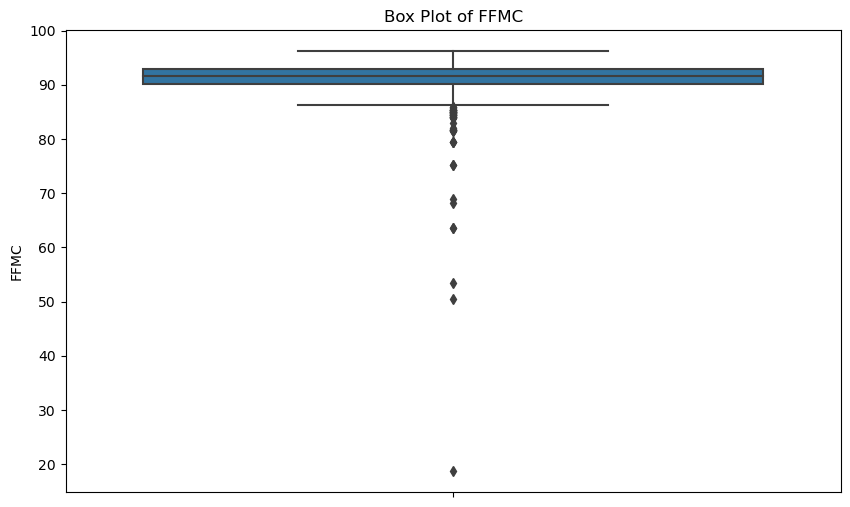

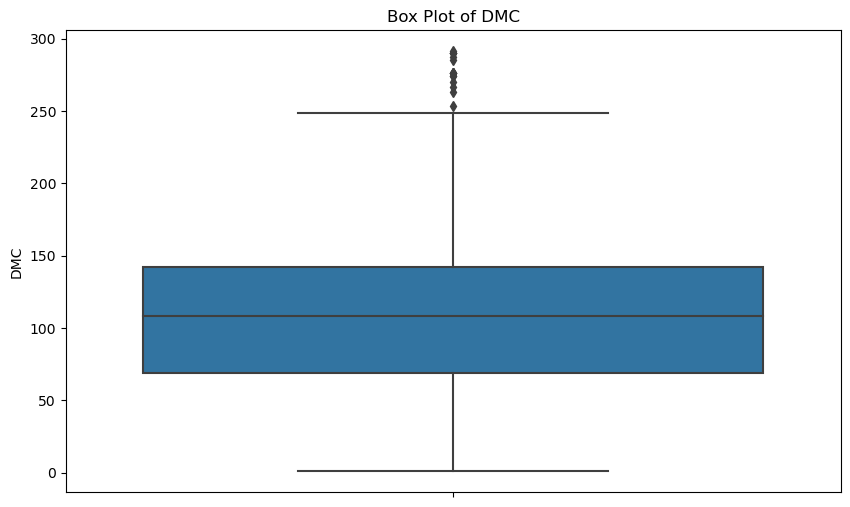

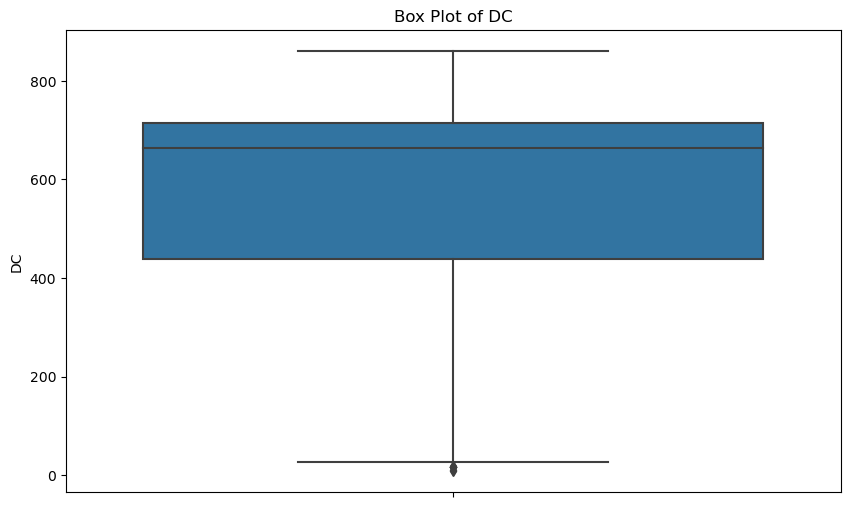

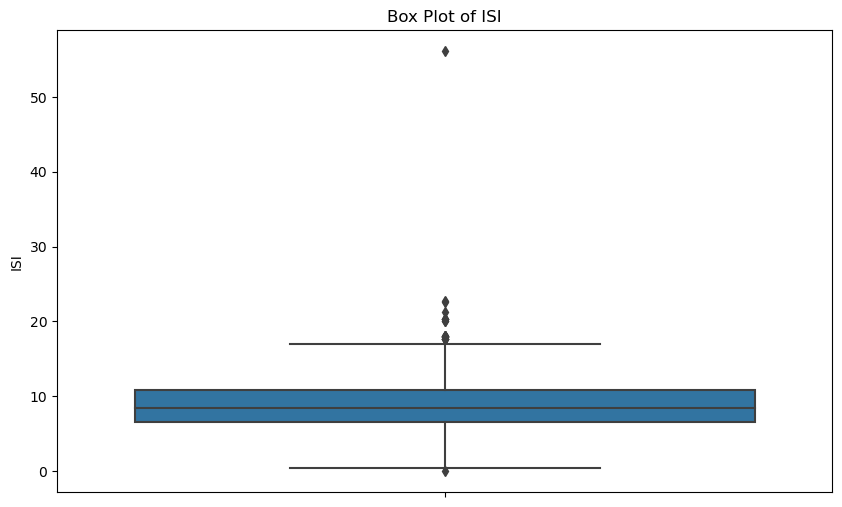

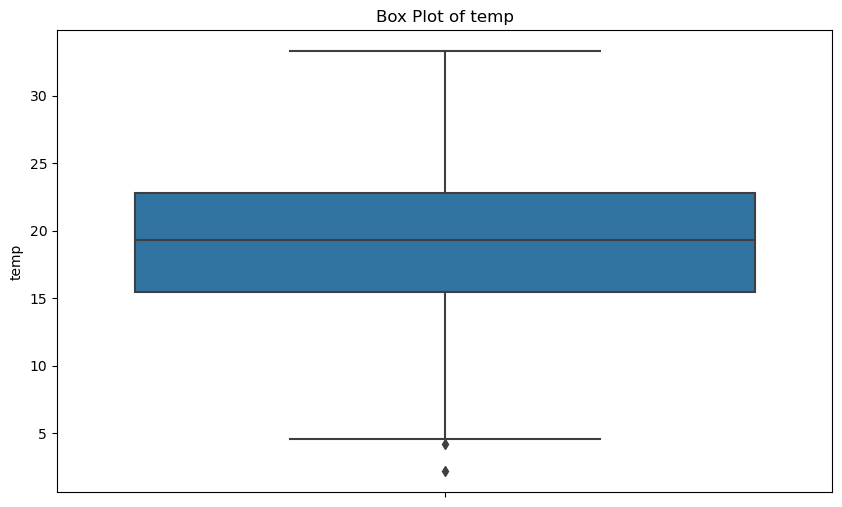

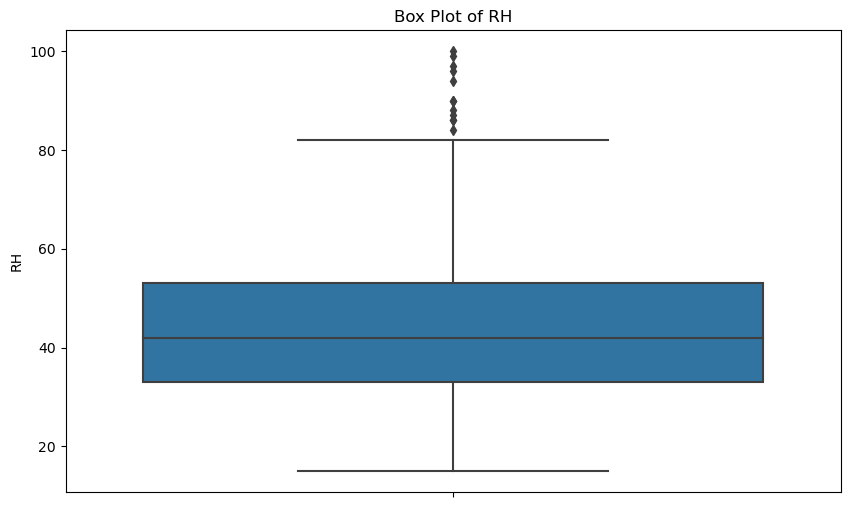

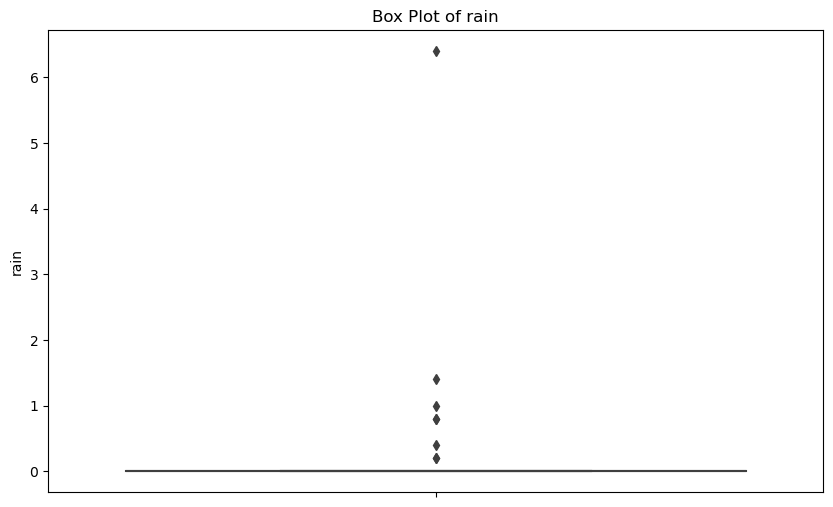

In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df, features):
    for feature in features:
        if feature in df.columns:  # Check if the feature exists in the DataFrame
            plt.figure(figsize=(10, 6))
            if pd.api.types.is_numeric_dtype(df[feature]):  # Check if the feature is numeric
                sns.boxplot(y=df[feature])
                plt.title(f'Box Plot of {feature}')
                plt.ylabel(feature)
            else:
                print(f'{feature} is not numeric and will be skipped.')
            plt.show()
        else:
            print(f'{feature} not found in DataFrame and will be skipped.')

# List of all features to plot
features = ['X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'rain']

# Call the function
plot_boxplots(df_cleaned, features)




In [14]:
import pandas as pd
import numpy as np

def remove_outliers(df, features):
    df_cleaned = df.copy()  
    
    for feature in features:
        if pd.api.types.is_numeric_dtype(df[feature]):  # Ensure the feature is numeric
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df_cleaned[feature].quantile(0.30)
            Q3 = df_cleaned[feature].quantile(0.70)
            IQR = Q3 - Q1
            
            # Define the bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Remove outliers from the DataFrame
            df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]
    
    return df_cleaned

# List of all features to check for outliers
features = ['X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']

# Remove outliers
df_cleaned = remove_outliers(df_cleaned, features)

# df_cleaned now contains the DataFrame with outliers removed


In [15]:
print(df['rain'].describe())


count    517.000000
mean       0.021663
std        0.295959
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.400000
Name: rain, dtype: float64


In [16]:
df_cleaned = df_cleaned.drop('rain', axis=1)


In [17]:
df_cleaned
df_cleaned = df_cleaned.drop('day', axis=1)

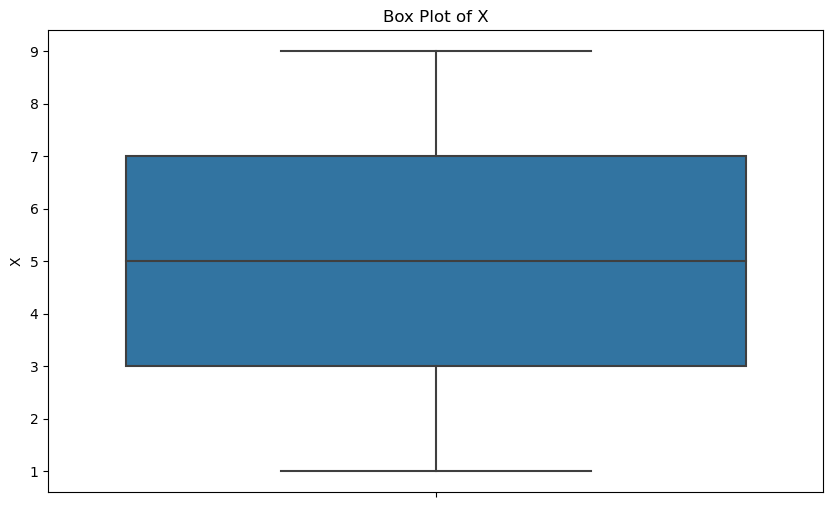

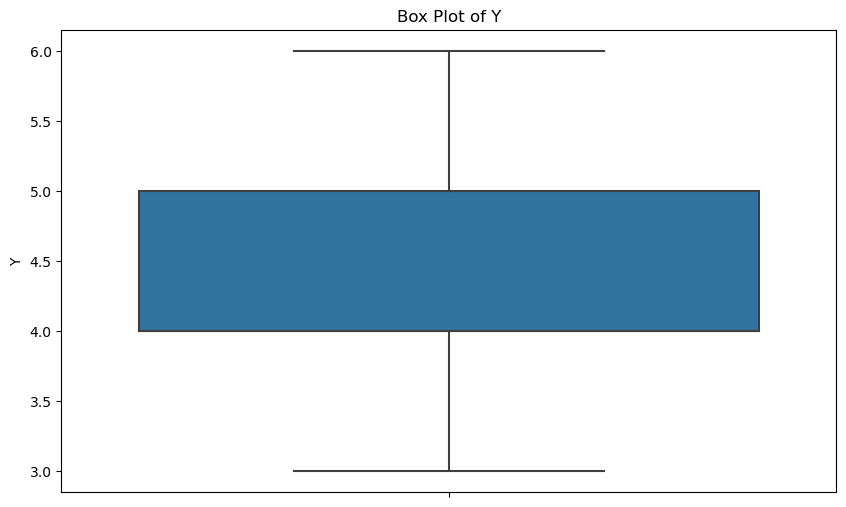

month is not numeric and will be skipped.


<Figure size 1000x600 with 0 Axes>

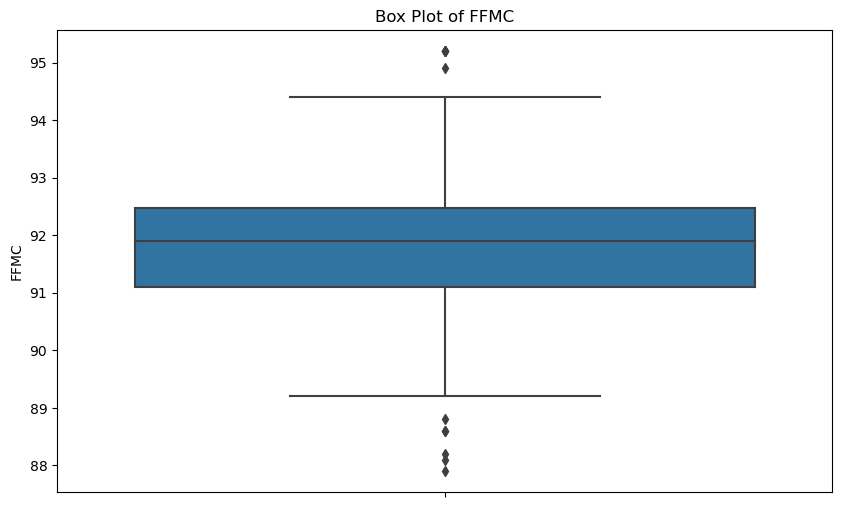

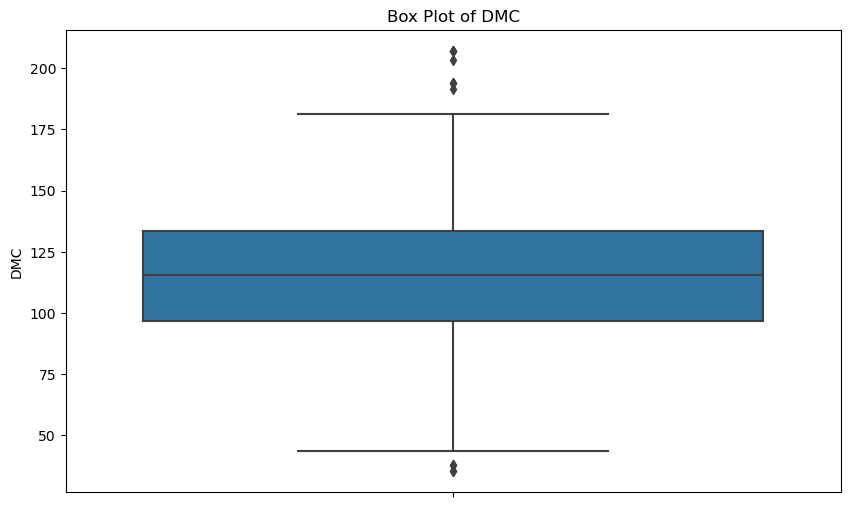

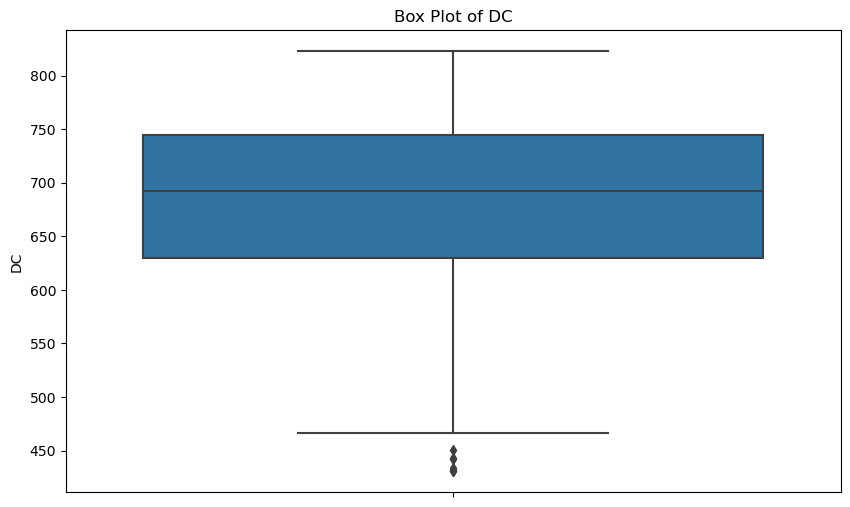

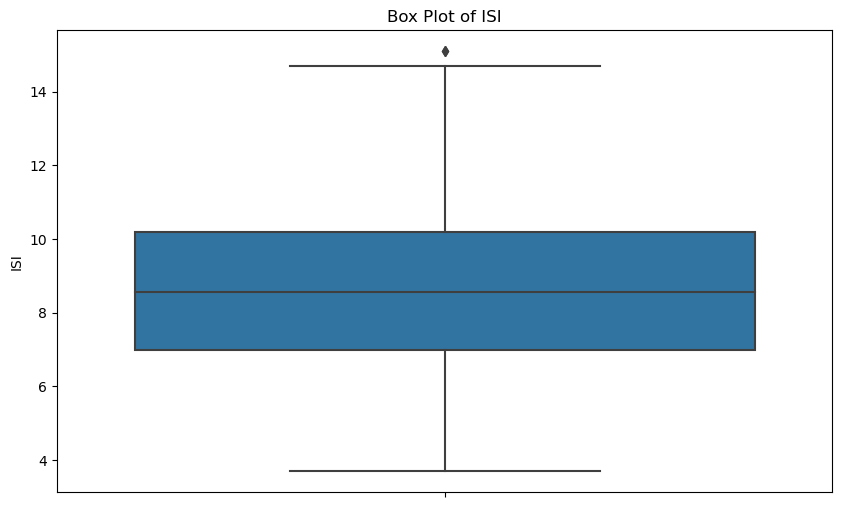

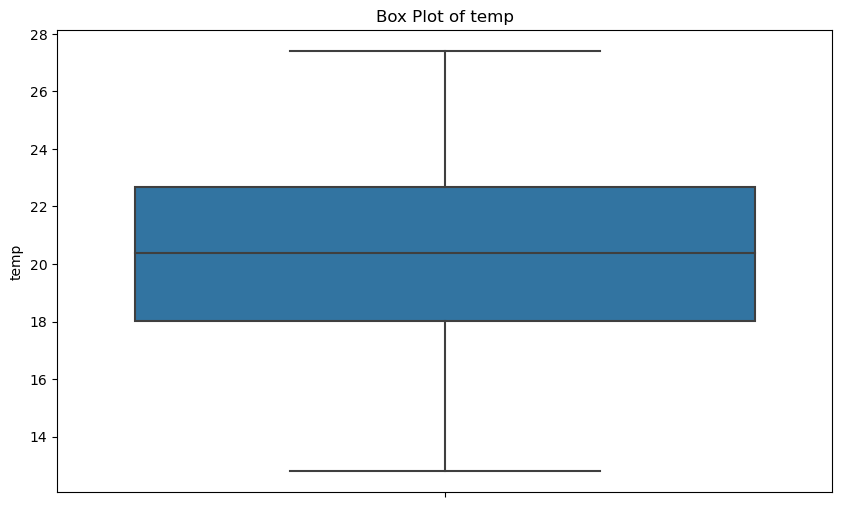

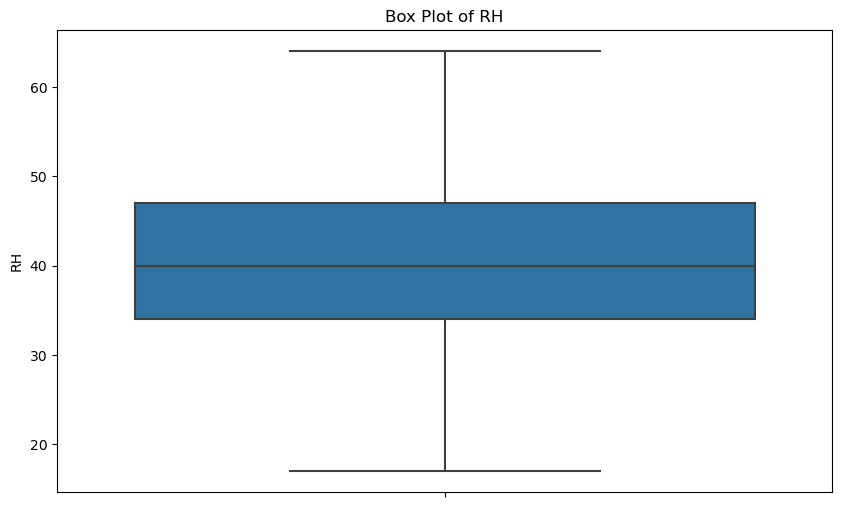

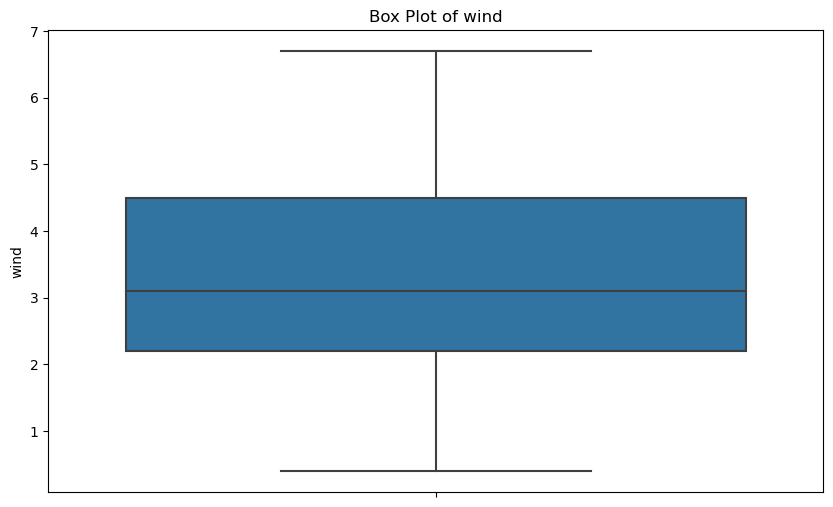

In [18]:


def plot_boxplots(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        if pd.api.types.is_numeric_dtype(df[feature]):  # Check if the feature is numeric
            sns.boxplot(y=df[feature])
            plt.title(f'Box Plot of {feature}')
            plt.ylabel(feature)
        else:
            print(f'{feature} is not numeric and will be skipped.')
        plt.show()

# List of all features to plot
features = ['X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']

# Call the function
plot_boxplots(df_cleaned, features)


Correlation Matrix (Before Encoding):
             X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.376211  0.027168 -0.032967 -0.194302  0.076072 -0.001208   
Y     0.376211  1.000000  0.122891  0.157935 -0.217724  0.101717  0.007346   
FFMC  0.027168  0.122891  1.000000  0.274146 -0.150050  0.517710  0.352451   
DMC  -0.032967  0.157935  0.274146  1.000000 -0.056075  0.276508  0.335179   
DC   -0.194302 -0.217724 -0.150050 -0.056075  1.000000 -0.216430 -0.259097   
ISI   0.076072  0.101717  0.517710  0.276508 -0.216430  1.000000  0.188772   
temp -0.001208  0.007346  0.352451  0.335179 -0.259097  0.188772  1.000000   
RH    0.006256 -0.024518 -0.315054  0.049295  0.028981 -0.084785 -0.553898   
wind  0.006052 -0.044804  0.019353  0.031555 -0.107418  0.259801 -0.002653   
area  0.075351  0.086052  0.010485  0.024241 -0.064494 -0.016010  0.101613   

            RH      wind      area  
X     0.006256  0.006052  0.075351  
Y    -0.024518 -0.044804  0.0

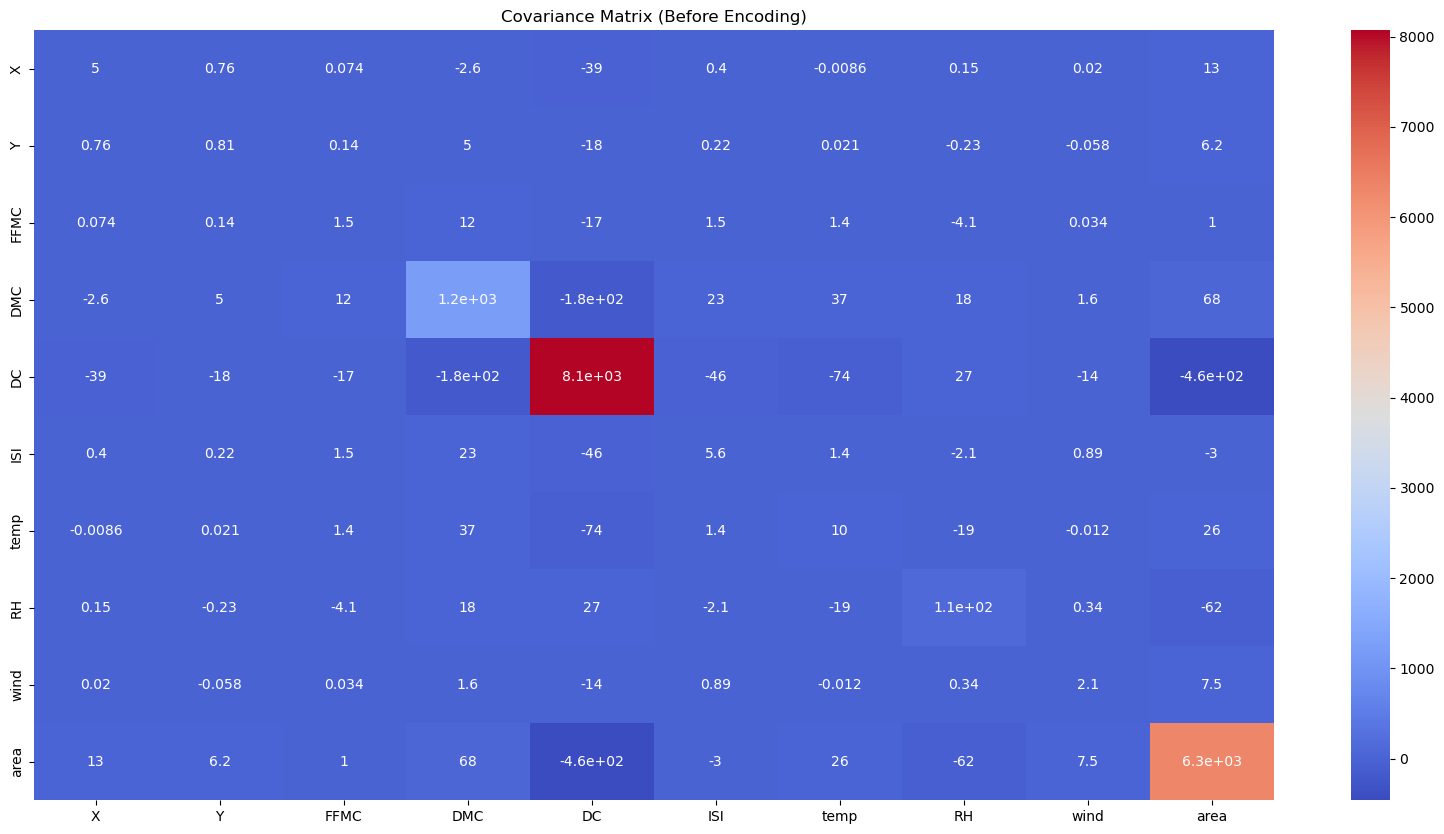

In [19]:


# Assuming df_cleaned is your DataFrame before encoding

# Calculate numerical features
numerical_features_before = df_cleaned.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix_before = numerical_features_before.corr()

# Calculate covariance matrix
covariance_matrix_before = numerical_features_before.cov()

# Print correlation matrix
print("Correlation Matrix (Before Encoding):")
print(correlation_matrix_before)

# Display covariance matrix using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(covariance_matrix_before, annot=True, cmap='coolwarm')
plt.title("Covariance Matrix (Before Encoding)")
plt.show()



In [20]:
print(df_cleaned['month'])

1      oct
2      oct
5      aug
6      aug
8      sep
      ... 
479    jul
482    aug
507    aug
510    aug
515    aug
Name: month, Length: 214, dtype: object


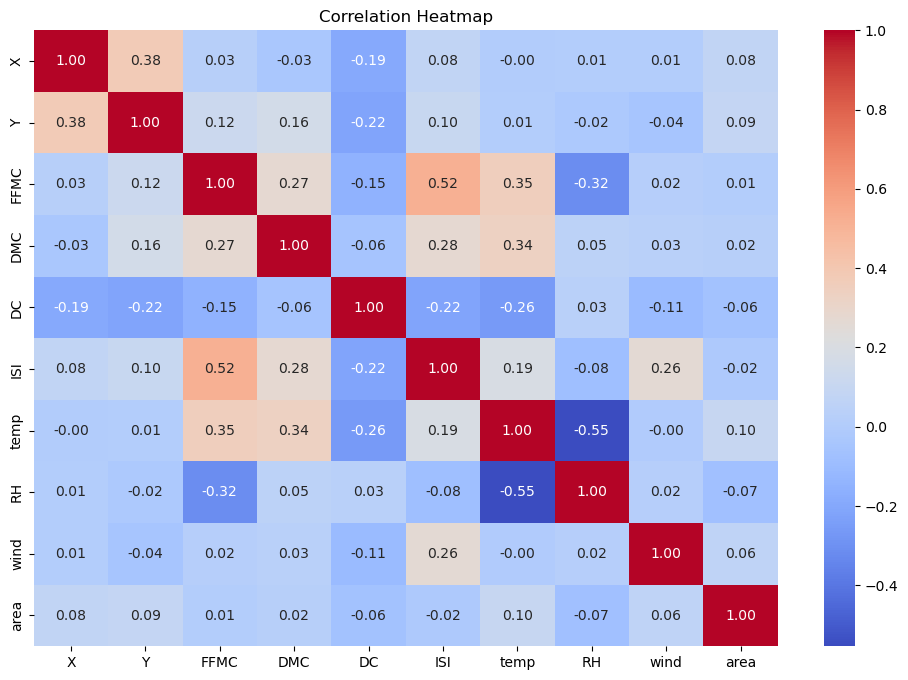

In [21]:
# Select only numeric columns from the DataFrame
numeric_df = df_cleaned.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Encode categorical features
df_clean_encoded = pd.get_dummies(df_cleaned, columns=['month'], drop_first=True)

# Convert boolean columns to integers
bool_columns = df_clean_encoded.select_dtypes(include='bool').columns
df_clean_encoded[bool_columns] = df_clean_encoded[bool_columns].astype(int)

# Print encoded DataFrame
print("Encoded DataFrame:")
print(df_clean_encoded)


Encoded DataFrame:
     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind    area  month_jul  \
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9    0.00          0   
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3    0.00          0   
5    8  6  92.3   85.3  488.0  14.7  22.2  29   5.4    0.00          0   
6    8  6  92.3   88.9  495.6   8.5  24.1  27   3.1    0.00          0   
8    8  6  91.0  129.5  692.6   7.0  13.1  63   5.4    0.00          0   
..  .. ..   ...    ...    ...   ...   ...  ..   ...     ...        ...   
479  7  4  89.2  103.9  431.6   6.4  22.6  57   4.9  278.53          1   
482  3  4  94.9  130.3  587.1  14.1  23.4  40   5.8    1.29          0   
507  2  4  91.0  166.9  752.6   7.1  25.9  41   3.6    0.00          0   
510  6  5  91.0  166.9  752.6   7.1  18.2  62   5.4    0.43          0   
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0    0.00          0   

     month_jun  month_oct  month_sep  
1            0          1          0  
2            0

In [23]:
df_clean_encoded = pd.get_dummies(df_cleaned, columns=['month'], drop_first=True)

print("Encoded DataFrame:")
print(df_clean_encoded)

Encoded DataFrame:
     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind    area  month_jul  \
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9    0.00      False   
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3    0.00      False   
5    8  6  92.3   85.3  488.0  14.7  22.2  29   5.4    0.00      False   
6    8  6  92.3   88.9  495.6   8.5  24.1  27   3.1    0.00      False   
8    8  6  91.0  129.5  692.6   7.0  13.1  63   5.4    0.00      False   
..  .. ..   ...    ...    ...   ...   ...  ..   ...     ...        ...   
479  7  4  89.2  103.9  431.6   6.4  22.6  57   4.9  278.53       True   
482  3  4  94.9  130.3  587.1  14.1  23.4  40   5.8    1.29      False   
507  2  4  91.0  166.9  752.6   7.1  25.9  41   3.6    0.00      False   
510  6  5  91.0  166.9  752.6   7.1  18.2  62   5.4    0.43      False   
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0    0.00      False   

     month_jun  month_oct  month_sep  
1        False       True      False  
2        False

In [24]:
bool_columns = df_clean_encoded.select_dtypes(include='bool').columns
df_clean_encoded[bool_columns] = df_clean_encoded[bool_columns].astype(int)
df_clean_encoded

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area,month_jul,month_jun,month_oct,month_sep
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.00,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.00,0,0,1,0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.00,0,0,0,0
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.00,0,0,0,0
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,7,4,89.2,103.9,431.6,6.4,22.6,57,4.9,278.53,1,0,0,0
482,3,4,94.9,130.3,587.1,14.1,23.4,40,5.8,1.29,0,0,0,0
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.00,0,0,0,0
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.43,0,0,0,0


In [25]:
correlation = df_clean_encoded['temp'].corr(df_clean_encoded['RH'])

print(f"Correlation between 'temp' and 'RH': {correlation}")

Correlation between 'temp' and 'RH': -0.5538979591866566


Correlation Matrix (AFter Encoding):
                   X          Y       FFMC          DMC           DC  \
X           4.997762   0.756527   0.074354    -2.585437   -39.022535   
Y           0.756527   0.809113   0.135325     4.983621   -17.593897   
FFMC        0.074354   0.135325   1.498685    11.773300   -16.502207   
DMC        -2.585437   4.983621  11.773300  1230.619869  -176.717418   
DC        -39.022535 -17.593897 -16.502207  -176.717418  8070.501784   
ISI         0.401795   0.216166   1.497378    22.917064   -45.936526   
temp       -0.008587   0.021015   1.372271    37.395876   -74.028451   
RH          0.147470  -0.232548  -4.066864    18.234145    27.452582   
wind        0.019582  -0.058328   0.034289     1.602074   -13.966385   
area       13.393092   6.154136   1.020505    67.611494  -460.649991   
month_jul   0.058356   0.000373   0.008863    -0.290167   -12.389671   
month_jun   0.015840   0.005836   0.009381     0.017042    -2.280282   
month_oct   0.034005  -0.01

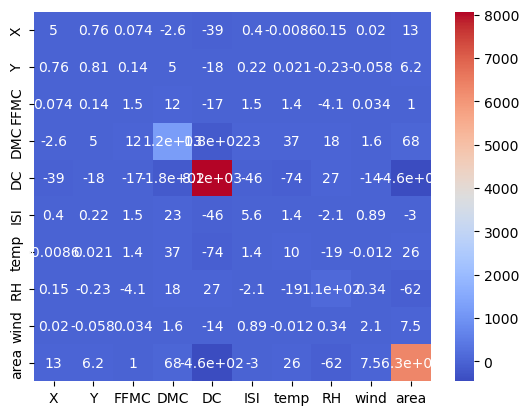

In [26]:
numerical_features = df_clean_encoded.select_dtypes(include='number')
correlation_matrix_after = numerical_features.corr()

covariance_matrix_after = numerical_features.cov()

print("Correlation Matrix (AFter Encoding):")
print(covariance_matrix_after)
plt.figsize=(10,8)
print("Covariance Matrix (After Encoding):")
sns.heatmap(covariance_matrix_before, annot=True, cmap='coolwarm')
plt.show()

In [27]:
df_clean_encoded.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area',
       'month_jul', 'month_jun', 'month_oct', 'month_sep'],
      dtype='object')

Covariance Matrix (After Encoding):
                   X          Y       FFMC          DMC           DC  \
X           4.997762   0.756527   0.074354    -2.585437   -39.022535   
Y           0.756527   0.809113   0.135325     4.983621   -17.593897   
FFMC        0.074354   0.135325   1.498685    11.773300   -16.502207   
DMC        -2.585437   4.983621  11.773300  1230.619869  -176.717418   
DC        -39.022535 -17.593897 -16.502207  -176.717418  8070.501784   
ISI         0.401795   0.216166   1.497378    22.917064   -45.936526   
temp       -0.008587   0.021015   1.372271    37.395876   -74.028451   
RH          0.147470  -0.232548  -4.066864    18.234145    27.452582   
wind        0.019582  -0.058328   0.034289     1.602074   -13.966385   
area       13.393092   6.154136   1.020505    67.611494  -460.649991   
month_jul   0.058356   0.000373   0.008863    -0.290167   -12.389671   
month_jun   0.015840   0.005836   0.009381     0.017042    -2.280282   
month_oct   0.034005  -0.011

<Axes: >

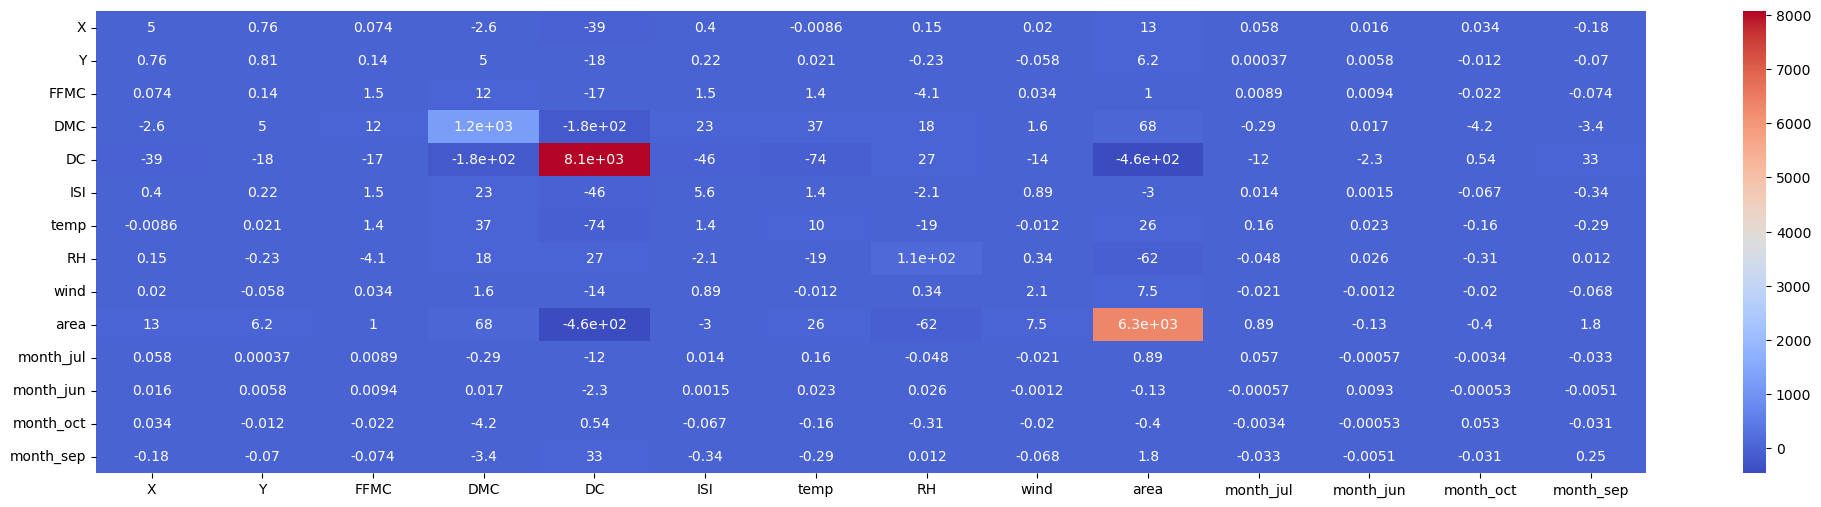

In [28]:
plt.figure(figsize=(25, 6)) 
print("Covariance Matrix (After Encoding):")
print(covariance_matrix_after)
print("Covariance Matrix (after Encoding):")
sns.heatmap(covariance_matrix_after, annot=True, cmap='coolwarm')


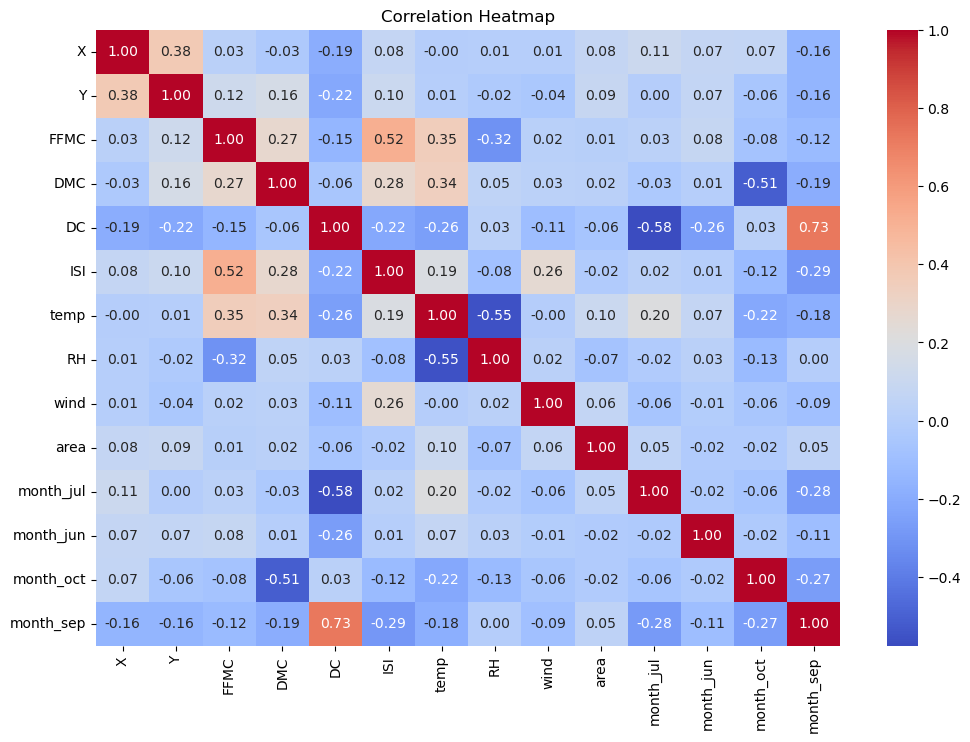

In [29]:
correlation_matrix = df_clean_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [30]:



# List of month-related columns
month_columns = ['month_jul', 'month_jun', 'month_oct', 'month_sep']

# Calculate the correlation of month-related columns with 'temp'
correlations = df_clean_encoded[month_columns + ['temp']].corr()

# Extract the correlation of month columns with 'temp'
correlation_with_temp = correlations['temp'][month_columns]

# Print the correlation values
print("Correlation between month columns and temperature:\n", correlation_with_temp)

Correlation between month columns and temperature:
 month_jul    0.203686
month_jun    0.074024
month_oct   -0.218163
month_sep   -0.184111
Name: temp, dtype: float64


Correlation between 'temp' and 'wind': -0.0026529733454565977


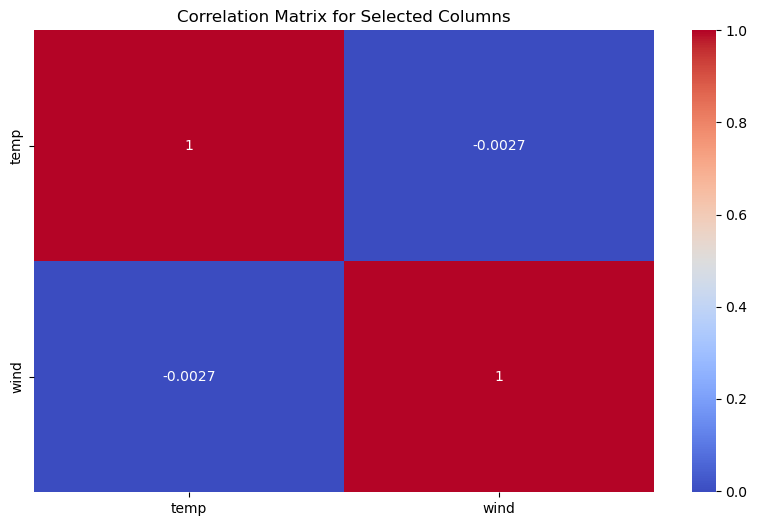

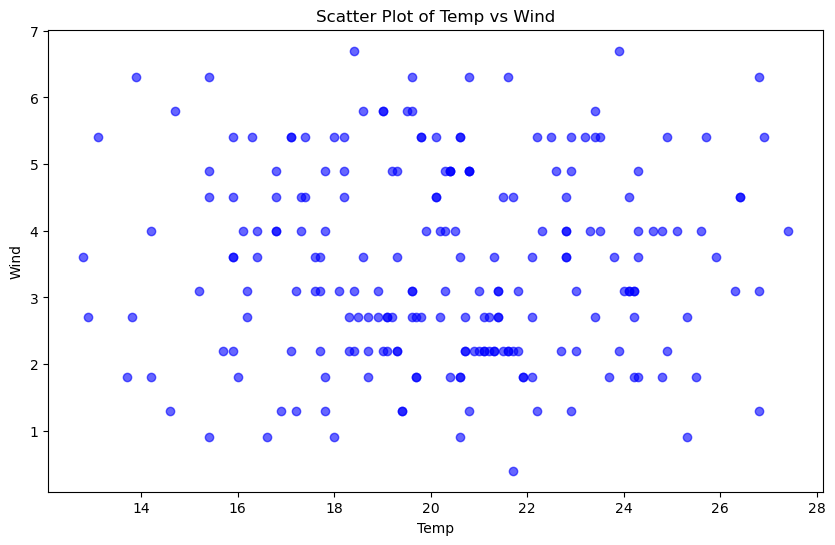

In [31]:
# Define the specific columns for comparison
column_x = 'temp'
column_y = 'wind'  # Replace with a column that exists in your DataFrame

# Calculate the correlation matrix for the specific columns
correlation_matrix_specific = df_clean_encoded[[column_x, column_y]].corr()

# Extract the correlation between 'temp' and the new column
correlation_between_columns = correlation_matrix_specific.loc[column_x, column_y]
print(f"Correlation between '{column_x}' and '{column_y}': {correlation_between_columns}")

# Plot the heatmap of the correlation matrix for the selected columns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_specific, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Columns')
plt.show()

# Plot the scatter plot for 'temp' vs the new column
plt.figure(figsize=(10, 6))
plt.scatter(df_clean_encoded[column_x], df_clean_encoded[column_y], alpha=0.6, color='blue')
plt.xlabel(column_x.capitalize())
plt.ylabel(column_y.capitalize())
plt.title(f'Scatter Plot of {column_x.capitalize()} vs {column_y.capitalize()}')
plt.show()


In [32]:
target_corr = correlation_matrix_after['area'].drop('area')  # Drop the 'area' correlation with itself
print("\nCorrelation with Target Variable (After Encoding):")
print(target_corr)

# Define a threshold for high correlation
threshold = 0.2  # You can adjust this threshold based on your needs

# Select features with high correlation with the target variable
high_corr_features = target_corr[abs(target_corr) > threshold].index
print("\nFeatures with High Correlation with Target Variable:")
print(high_corr_features)


Correlation with Target Variable (After Encoding):
X            0.075351
Y            0.086052
FFMC         0.010485
DMC          0.024241
DC          -0.064494
ISI         -0.016010
temp         0.101613
RH          -0.074388
wind         0.064937
month_jul    0.046801
month_jun   -0.017592
month_oct   -0.021871
month_sep    0.045568
Name: area, dtype: float64

Features with High Correlation with Target Variable:
Index([], dtype='object')


In [33]:
df_clean_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1 to 515
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          214 non-null    int64  
 1   Y          214 non-null    int64  
 2   FFMC       214 non-null    float64
 3   DMC        214 non-null    float64
 4   DC         214 non-null    float64
 5   ISI        214 non-null    float64
 6   temp       214 non-null    float64
 7   RH         214 non-null    int64  
 8   wind       214 non-null    float64
 9   area       214 non-null    float64
 10  month_jul  214 non-null    int32  
 11  month_jun  214 non-null    int32  
 12  month_oct  214 non-null    int32  
 13  month_sep  214 non-null    int32  
dtypes: float64(7), int32(4), int64(3)
memory usage: 21.7 KB


In [34]:
df_clean_encoded.columns


Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area',
       'month_jul', 'month_jun', 'month_oct', 'month_sep'],
      dtype='object')

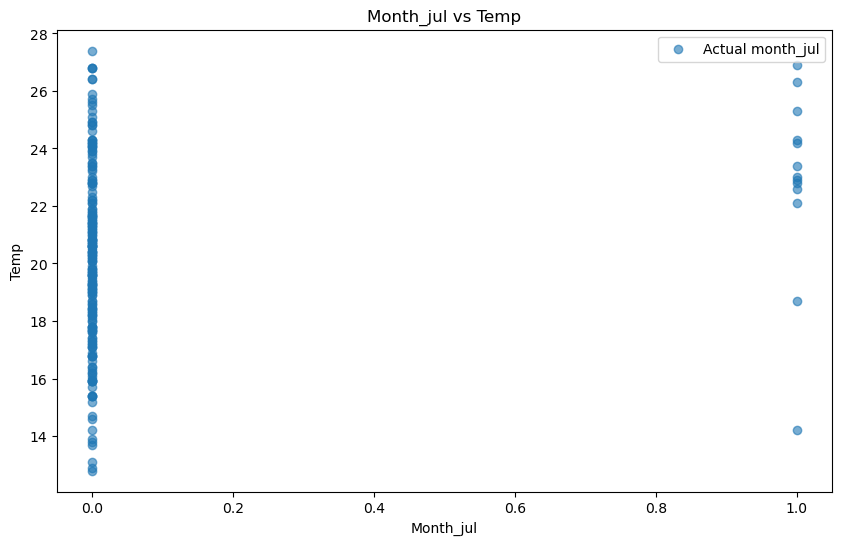

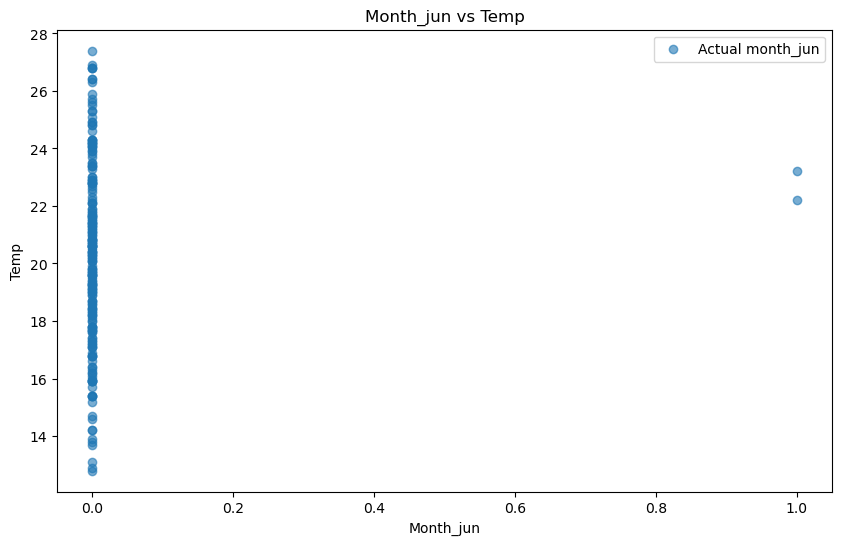

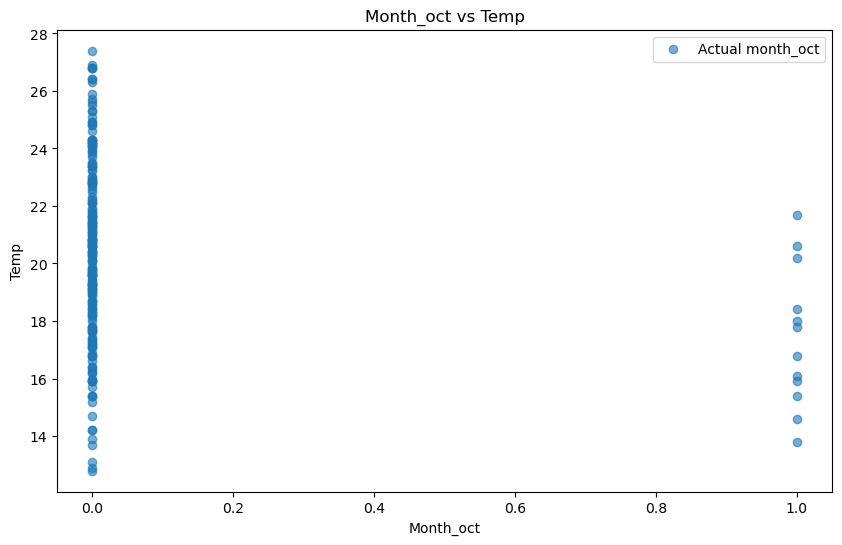

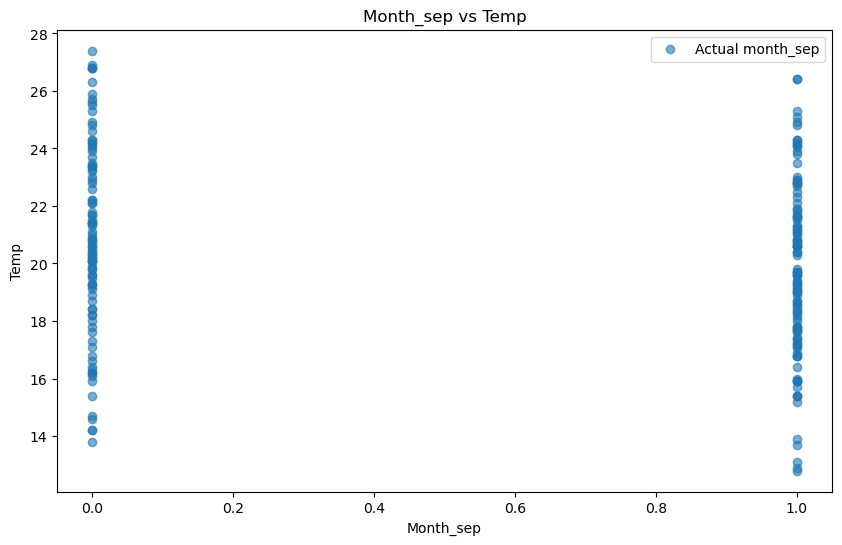

In [35]:
months = ['month_jul', 'month_jun', 'month_oct', 'month_sep']
for month in months:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clean_encoded[month], df_clean_encoded['temp'], label=f'Actual {month}', alpha=0.6)
    plt.title(f'{month.capitalize()} vs Temp')
    plt.xlabel(month.capitalize())
    plt.ylabel('Temp')
    plt.legend()
    plt.show()


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#y=m1*x1 +m2*x2 +m3*x3+c
X = df_clean_encoded.drop(columns=['temp']) 
y = df_clean_encoded['temp'] 
print("X head:\n", X.head())
print("y head:\n", y.head())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
#y=m1*x1 +m2*x2 +m3*x3+c


X head:
    X  Y  FFMC    DMC     DC   ISI  RH  wind  area  month_jul  month_jun  \
1  7  4  90.6   35.4  669.1   6.7  33   0.9   0.0          0          0   
2  7  4  90.6   43.7  686.9   6.7  33   1.3   0.0          0          0   
5  8  6  92.3   85.3  488.0  14.7  29   5.4   0.0          0          0   
6  8  6  92.3   88.9  495.6   8.5  27   3.1   0.0          0          0   
8  8  6  91.0  129.5  692.6   7.0  63   5.4   0.0          0          0   

   month_oct  month_sep  
1          1          0  
2          1          0  
5          0          0  
6          0          0  
8          0          1  
y head:
 1    18.0
2    14.6
5    22.2
6    24.1
8    13.1
Name: temp, dtype: float64
Mean Squared Error (MSE): 5.445060552178412
R-squared: 0.36129193151925443
Coefficients: [ 0.06462172 -0.28679245  0.37561883  0.83967644  0.0261805  -0.0671507
 -1.62525349 -0.04575923  0.21319317  0.59520602  0.07988368 -0.55975142
 -0.57437766]
Intercept: 20.20092830450178


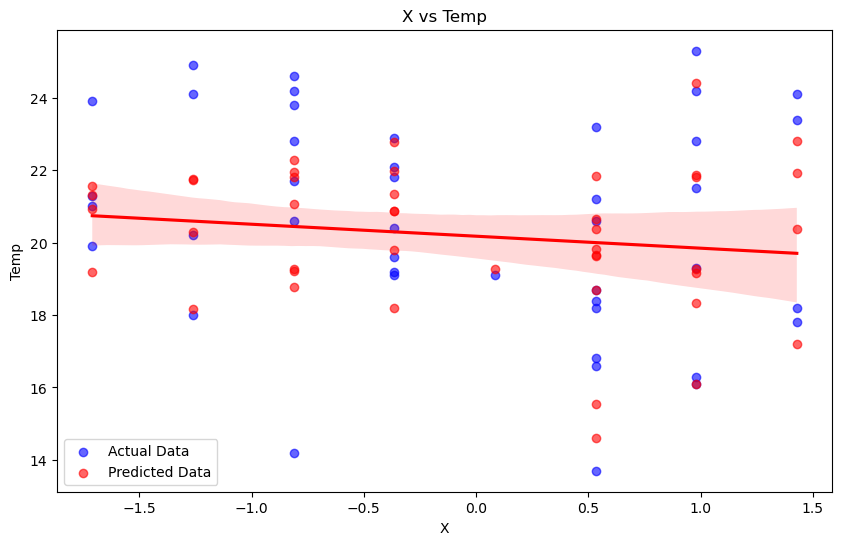

In [37]:


feature_to_plot = 'X'  # Replace with the feature you want to plot

plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X_test[feature_to_plot], y_test, color='blue', label='Actual Data', alpha=0.6)

# Scatter plot of predicted data
plt.scatter(X_test[feature_to_plot], y_pred, color='red', label='Predicted Data', alpha=0.6)

# Plot the best fit line using seaborn
sns.regplot(x=X_test[feature_to_plot], y=y_pred, scatter=False, color='red', line_kws={'label': 'Best Fit Line'})

plt.title(f'{feature_to_plot.capitalize()} vs Temp')
plt.xlabel(feature_to_plot.capitalize())
plt.ylabel('Temp')
plt.legend()
plt.show()


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features and target variable
X = df_clean_encoded.drop(columns=['area'])  # Independent variables
y = df_clean_encoded['area']  # Dependent variable

# Print the first few rows of X and y
print("X head:\n", X.head())
print("y head:\n", y.head())

# Initialize and apply StandardScaler
scaler1= StandardScaler()
X_scaled = scaler1.fit_transform(X)

# Convert the scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))




X head:
    X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  month_jul  month_jun  \
1  7  4  90.6   35.4  669.1   6.7  18.0  33   0.9          0          0   
2  7  4  90.6   43.7  686.9   6.7  14.6  33   1.3          0          0   
5  8  6  92.3   85.3  488.0  14.7  22.2  29   5.4          0          0   
6  8  6  92.3   88.9  495.6   8.5  24.1  27   3.1          0          0   
8  8  6  91.0  129.5  692.6   7.0  13.1  63   5.4          0          0   

   month_oct  month_sep  
1          1          0  
2          1          0  
5          0          0  
6          0          0  
8          0          1  
y head:
 1    0.0
2    0.0
5    0.0
6    0.0
8    0.0
Name: area, dtype: float64
Mean Squared Error (MSE): 1171.155250877008
R-squared: -0.49038184764476256
